## Summary of the code below.

Data source: 
- https://www.fao.org/markets-and-trade/commodities-overview/basic-foods/fao-dairy-price-index/en
- https://fred.stlouisfed.org/series/PWHEAMTUSDM


1) Acess to the excel file containing the dairy price index
2) Read and clean the data
3) Put it in a DataFrame
4) 

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

import sys
sys.path.append(r'C:\Users\jeanb\Documents\Suisse\Job Search\Mondelez International\Market Analyst\Technical Interview Preparation Data')

### 1. Data handling

In [53]:
#Read the data in the relevant Excel sheet
df = pd.read_excel(io='fao-dariy-price-indices-oct.xlsx', sheet_name='Dairy Price Index', skiprows=4) #data starts row 5
#Clean the data --> drop rows with NA values
df = df.dropna(axis='rows')
#Rename the columns
df.columns = ['Date', 'Dairy Price Index', 'Butter Index', 'SMP Index', 'WMP Index', 'Cheese Index', 'Wheat Price']
df.tail()

,Date,Dairy Price Index,Butter Index,SMP Index,WMP Index,Cheese Index,Wheat Price
420,2025-02-01,147.687011,201.013020,106.679488,142.867800,147.531714,190.102642
421,2025-03-01,148.736780,212.343462,108.283922,143.425443,146.081283,179.606542
422,2025-04-01,151.721707,218.010960,110.135632,147.062778,148.495737,174.816743
423,2025-05-01,153.626094,218.967925,110.161713,153.180885,149.698095,196.841071
424,2025-06-01,155.504596,226.182527,109.856405,149.584970,152.751448,173.194763


In [54]:
#We split the data into the one that will train the model (67%) and the one upon which the model will be tested upon (33%)
def split_data(data: pd.DataFrame):
    data = data.copy()

    X_train = data['Wheat Price']
    y_train = data['Dairy Price Index']
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

    return X_train, y_train

In [55]:
X_train, y_train = split_data(df)
X_train = X_train.values
y_train = y_train.values

#Normalizing the 
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

X_train = (X_train - X_mean) / X_std
y_train = (y_train - y_mean) / y_std

#X_train = (X_train - np.mean(X_train)) / np.std(X_train)
#y_train = (y_train - np.mean(y_train)) / np.std(y_train)

#Visualizing the dataset
print("Type of x_train:",type(X_train))
print("First five elements of x_train are:\n", X_train[:5])
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [-0.33838969 -0.4036399  -0.36013968 -0.51239033 -0.71357841]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [-1.03538549 -1.34941916 -1.14511023 -1.41243339 -1.41243339]


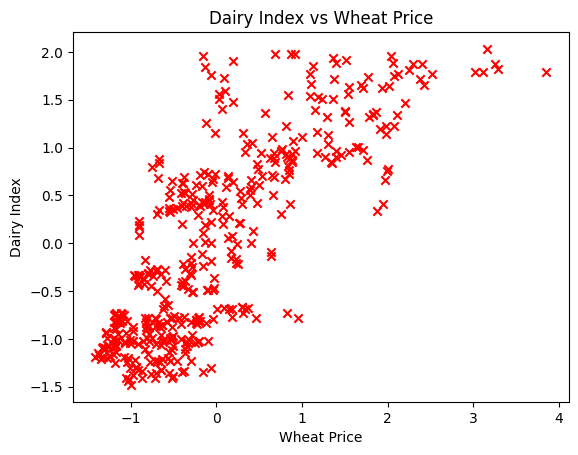

In [56]:
# Create a scatter plot of the data.
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Dairy Index vs Wheat Price")
# Set the y-axis label
plt.ylabel('Dairy Index')
# Set the x-axis label
plt.xlabel('Wheat Price')
plt.show()

In [ ]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    """
    # number of training examples
    m = x.shape[0] 
    
    total_cost = 0

    cost=0
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2
    
    total_cost = cost/(2*m)
    

    return total_cost

In [ ]:
#Testing purposes
initial_w = 2
initial_b = 1

cost = compute_cost(X_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')


<class 'numpy.float64'>
Cost at initial w (zeros): 1.414


In [ ]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    dj_dw /= m
    dj_db /= m
            
    return dj_dw, dj_db

In [60]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -0.7927527959548348 5.423112939110176e-16


In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
   

    return w, b, J_history, w_history #return w and J,w history for graphing

In [62]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     0.49   
Iteration  150: Cost     0.20   
Iteration  300: Cost     0.19   
Iteration  450: Cost     0.19   
Iteration  600: Cost     0.19   
Iteration  750: Cost     0.19   
Iteration  900: Cost     0.19   
Iteration 1050: Cost     0.19   
Iteration 1200: Cost     0.19   
Iteration 1350: Cost     0.19   
w,b found by gradient descent: 0.7927525710857893 -3.17811136884463e-17


In [63]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

In [64]:
#Revert Normalization
#X_train = X_train * X_std + X_mean
#predicted = predicted * y_std + y_mean

Text(0.5, 0, 'Wheat price')

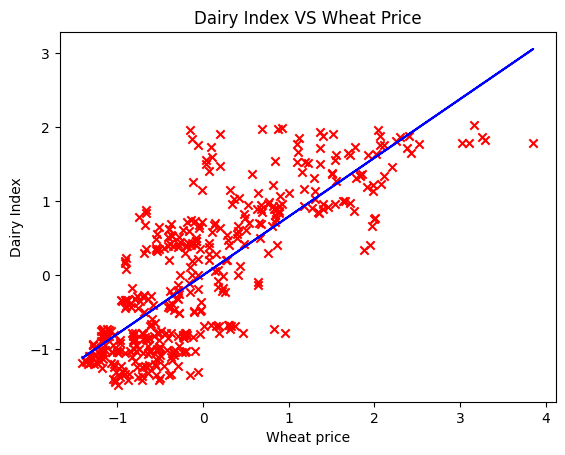

In [65]:
# Plot the linear fit
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Dairy Index VS Wheat Price")
# Set the y-axis label
plt.ylabel('Dairy Index')
# Set the x-axis label
plt.xlabel('Wheat price')